In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import random
import pandas as pd
import time
from collections import deque 

## Variable Global

In [2]:
matrizDistancias = []
tiempo = 0

## Funciones Auxiliares Comunes

In [3]:
# Dado un String, Lee el archivo correspondiente
def leeArchivo(archivo):
    f = open("tsp/" + archivo)
    x = []
    y = []
    cont = 0;
    for linea in f:
        cont += 1
        sp = linea.split(" ")
        if cont > 6 and sp[0] != "EOF\n":
            i = -2
            xp = sp[i]
            while xp == "":
                i -= 1
                xp = sp[i]
            yp = sp[-1].split("\n")
            x.append(float(xp))
            y.append(float(yp[0]))  
    return x,y

In [4]:
# Calcula la distancia entre dos puntos (x,y) - (x2,y2)
def calculaDistancia(x, y, x2, y2):
    xd = x - x2
    yd = y - y2
    return round(math.sqrt(xd*xd + yd*yd))

In [5]:
# Pinta todos los puntos recibiendo una lista de puntos x e y
def pintaMapa(x,y):
    plt.figure(figsize=(15, 8))
    plt.scatter(x,y)
    plt.show()

In [6]:
# Dado un vector de resultado, pinta el resultado de este vector sobre los puntos
def pintaCamino(v,x,y,coste):
    plt.figure(figsize=(15, 8))
    xc = []
    yc = []
    for i in v:
            xc.append(x[i])
            yc.append(y[i])
    
    xc.append(x[v[0]])
    yc.append(y[v[0]])
    
    plt.plot(xc,yc,"y")
    plt.scatter(x,y, c = "black")
    plt.scatter(xc[0],yc[0],c="green")
    plt.scatter(xc[-2],yc[-2],c="red")
    
    plt.suptitle("Mejor camino con coste " + str(coste),fontsize=20)
    
    plt.show()    

In [7]:
# Calcula matriz de distancias
def calculaMatrizDistancias(x,y):
    global matrizDistancias 
    matrizDistancias = np.zeros((len(x),len(y)))
    for i in range(len(x)):
        for j in range(len(y)):
            matrizDistancias[i,j] = calculaDistancia(x[i],y[i],x[j],y[j])

In [8]:
# Calcula Coste del vector Solucion
def calculaCoste(vResultado):
    kms = 0;
    for i in range(1,len(vResultado)):
            kms += matrizDistancias[vResultado[i-1]][vResultado[i]]
    kms += matrizDistancias[vResultado[-1]][vResultado[0]]
    return kms

In [9]:
# Calcula Coste Vecino
def calculaCosteVecino(costeSolAntigua, sAntigua, sActual, i1, i2):
    if i1 + 1 > len(sActual) - 1:
        piv1 = 0
    else:
        piv1 = i1 + 1
    
    if i2 + 1 > len(sActual) - 1:
        piv = 0
    else:
        piv = i2 + 1
    
    
    coste = costeSolAntigua - matrizDistancias[sAntigua[i1 - 1]][sAntigua[i1]] - matrizDistancias[sAntigua[ piv1]][sAntigua[i1]]
    coste = coste - matrizDistancias[sAntigua[i2 - 1]][sAntigua[i2]] - matrizDistancias[sAntigua[piv]][sAntigua[i2]]
    coste = coste + matrizDistancias[sActual[i1 - 1]][sActual[i1]] + matrizDistancias[sActual[ piv1]][sActual[i1]]
    coste = coste + matrizDistancias[sActual[i2 - 1]][sActual[i2]] + matrizDistancias[sActual[piv]][sActual[i2]]
    return coste

In [10]:
# Genera solucion aleatoria
def solucionAleatoria(tam, num):
    vResult = list(range(0,tam))
    random.seed(num)
    for i in range(0,tam):
        rnd = random.randint(0,tam-1)
        vResult[i], vResult[rnd] = vResult[rnd], vResult[i]
    return vResult

In [11]:
# Tic
def tic():
    global tiempo 
    tiempo = time.time()

In [12]:
# Toc
def toc():
    global tiempo 
    return  (time.time() - tiempo)

In [13]:
def representaResultados(analisisResultado):
    tablaFinal = pd.DataFrame(columns=["Semilla","Coste","Numero Evaluaciones", "Tiempo"])
    for i in range(0,10):
        tablaFinal.loc[len(tablaFinal)] = [analisisResultado[i][0],analisisResultado[i][1],analisisResultado[i][2],analisisResultado[i][3]]
        
    display(tablaFinal)
    print("Media coste: ", tablaFinal[["Coste"]].mean()[0])
    print("Desviación típica coste: ", tablaFinal[["Coste"]].std()[0])
    print("Media numero de evaluaciones: ", tablaFinal[["Numero Evaluaciones"]].mean()[0])
    print("Desviación típica de evaluaciones: ", tablaFinal[["Numero Evaluaciones"]].std()[0])
    print("Media tiempo: ", tablaFinal[["Tiempo"]].mean()[0])

# Fichero a Analizar

In [14]:
# x, y = leeArchivo("st70.tsp")
x, y = leeArchivo("ch130.tsp")
# x, y = leeArchivo("a280.tsp")
# x, y = leeArchivo("p654.tsp")
# x, y = leeArchivo("vm1084.tsp")
# x, y = leeArchivo("vm1748.tsp")
calculaMatrizDistancias(x,y)

# Algoritmo Greedy

In [15]:
# Algoritmo Greedy
def greedy(x,y,mostrar):
    tic()
    vResultado = [];
    nodosNoVisitados = list(range(0,len(x)))
    i = 0;
    vResultado.append(nodosNoVisitados[i])
    del nodosNoVisitados[i]
    while i < len(x) and nodosNoVisitados != []:
        nodoActual = vResultado[-1]
        ordenad = np.sort(matrizDistancias[nodoActual,:])
        k = 0
        encontrado = False
        while k < len(y) and encontrado == False:      
            minimo = np.where(ordenad[k] == matrizDistancias[nodoActual,:])
            max = len(minimo[0])
            z = 0
            while z < max and encontrado == False:
                if (minimo[0][z] in vResultado):
                    k += 1
                    z += 1
                else:
                    encontrado = True
        vResultado.append(minimo[0][z])
        nodosNoVisitados.remove(minimo[0][z])
        i += 1
    km = calculaCoste(vResultado)
    t = toc()
    # pintaMapa(x,y)
    if mostrar == "s":
        print("Tiempo de ejecucion = " + str(t))
        pintaCamino(vResultado,x,y, km)
    return vResultado, km

Tiempo de ejecucion = 0.006972074508666992


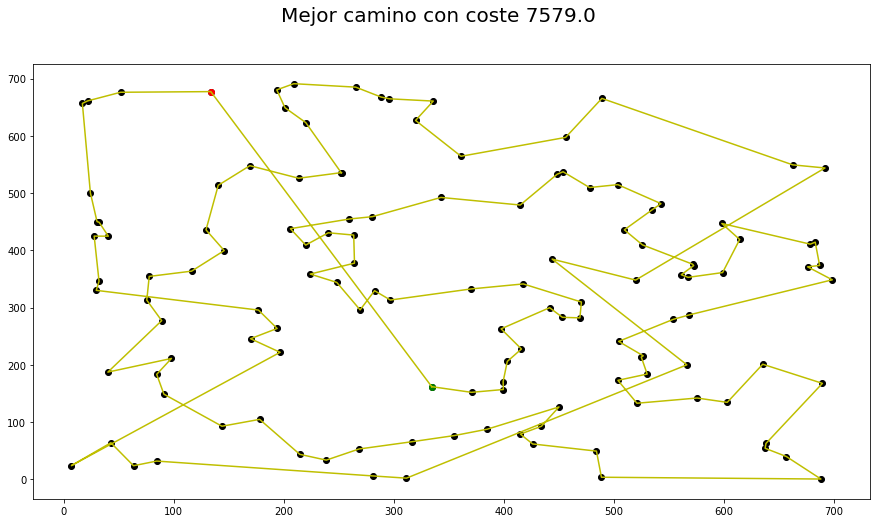

In [16]:
# Greedy
resultado, km = greedy(x, y,"s")

# Busqueda Aleatoria

In [17]:
# Algoritmo Busqueda Aleatoria
def busquedaAleatoria(x,y):
    tam = len(x)
    analisisResultado = []
    mejorCam = []
    costeFinal = float("inf")
    for z in range(0,10):
        resultadoIntermedio = []
        tic()
        mejorCoste = float("inf")
        mejor = [];
        random.seed(z)
        for j in range(0,1600*tam):
            vResult = list(range(0,tam))
            for i in range(0,tam):
                rnd = random.randint(0,tam-1)
                vResult[i], vResult[rnd] = vResult[rnd], vResult[i]
            coste = calculaCoste(vResult)
            if coste < mejorCoste:
                mejor = vResult.copy()
                mejorCoste = coste

        if mejorCoste < costeFinal:
            costeFinal = mejorCoste
            mejorCam = mejor.copy()
        t = toc()
        resultadoIntermedio.append(z)
        resultadoIntermedio.append(mejorCoste)
        resultadoIntermedio.append(t)
        analisisResultado.append(resultadoIntermedio)
        
    representaResultados(analisisResultado)
    pintaCamino(mejorCam,x,y, costeFinal)

,Semilla,Coste,Tiempo
0,0.0,38925.0,44.267056
1,1.0,38437.0,44.747227
2,2.0,38240.0,41.364702
3,3.0,38898.0,40.605511
4,4.0,38616.0,40.193500
5,5.0,39038.0,40.341546
6,6.0,38459.0,41.596467
7,7.0,38584.0,40.682357
8,8.0,39108.0,41.645141
9,9.0,38603.0,41.416340


Media coste:  38690.8
Desviación típica coste:  286.44596155102084


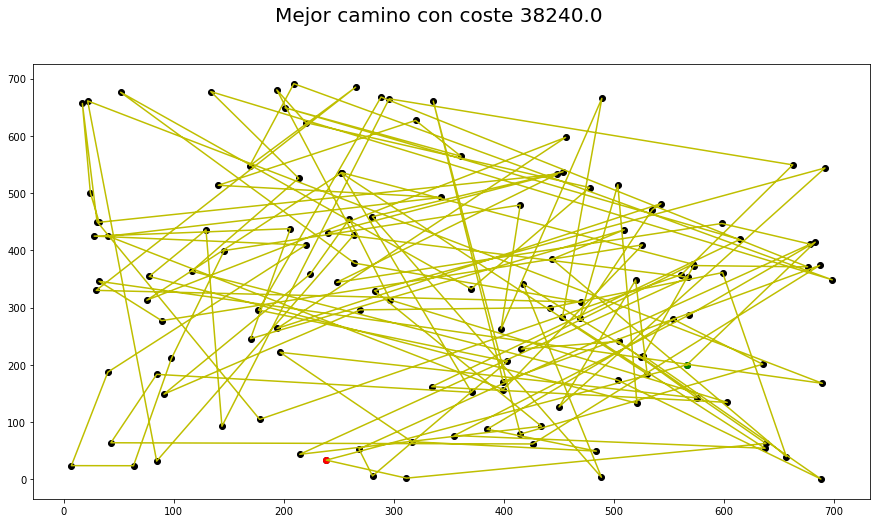

In [18]:
# Busqueda Aleatoria
busquedaAleatoria(x, y)

# Busquedas Locales

## Busqueda Local El Mejor

In [18]:
# Devuelve el mejor vecino
def mejorVecino(w, sumador, maximo):
    mejor = w;
    mejorCoste = calculaCoste(w)
    costeSolAntigua = mejorCoste.copy()
    for i in range(0, len(w)):
        for j in range(i + 1,len(w)):
            w2 = w.copy();
            w2[i], w2[j] = w2[j], w2[i]
            coste = calculaCosteVecino(costeSolAntigua, w, w2, i, j)
            if coste < mejorCoste :
                mejor = w2
                mejorCoste = coste
            if sumador >= maximo:
                break
            else :
                sumador +=1
        if sumador >= maximo:
            break
    return mejor, mejorCoste, sumador

In [19]:
# Algoritmo Busqueda Local El Mejor
def busquedaLocalElMejor(x,y):
    analisisResultado = []
    mejorCam = []
    costeFinal = float("inf")
    for z in range(0,10):
        resultadoIntermedio = []
        tic()
        w = solucionAleatoria(len(x),z)
        costeActual = calculaCoste(w)
        mejorV = []
        encontrado = False
        maximo = 1600 * len(x)
        i = 0
        while encontrado == False:
            mejorV, mejorCost, i = mejorVecino(w, i, maximo)
            if mejorCost < costeActual:
                w = mejorV.copy()
                costeActual = mejorCost
            elif i > maximo or mejorCost >= costeActual:
                encontrado = True
                
        if costeActual < costeFinal:
            costeFinal = costeActual
            mejorCam = w.copy()
        
        t = toc()
        resultadoIntermedio.append(z)
        resultadoIntermedio.append(costeActual)
        resultadoIntermedio.append(i)
        resultadoIntermedio.append(t)
        analisisResultado.append(resultadoIntermedio)
        
    representaResultados(analisisResultado)
    pintaCamino(mejorCam,x,y, costeFinal)

,Semilla,Coste,Numero Evaluaciones,Tiempo
0,0.0,23938.0,208000.0,1.059323
1,1.0,22697.0,208000.0,1.108053
2,2.0,23819.0,208000.0,1.006076
3,3.0,24761.0,208000.0,1.245612
4,4.0,23218.0,208000.0,1.155400
5,5.0,23262.0,208000.0,1.111122
6,6.0,23738.0,208000.0,1.031402
7,7.0,23022.0,208000.0,1.077668
8,8.0,23752.0,208000.0,0.981799
9,9.0,23460.0,208000.0,1.021731


Media coste:  23566.7
Desviación típica coste:  574.4994052796458
Media numero de evaluaciones:  208000.0
Desviación típica de evaluaciones:  0.0
Media tiempo:  1.0798185348510743


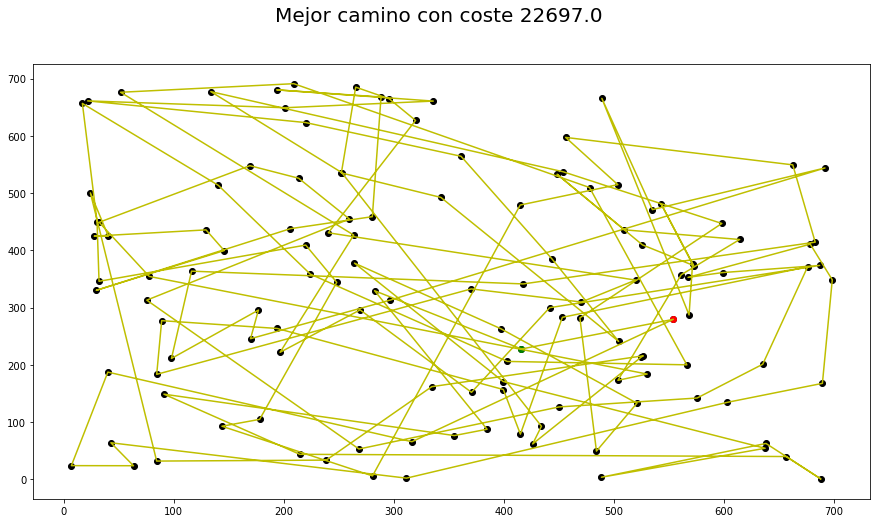

In [20]:
# Busqueda Local El Mejor
busquedaLocalElMejor(x, y)

## Busqueda Local El Primer Mejor

In [21]:
# Devuelve el primer mejor vecino
def primerMejorVecino(w, sumador, maximo):
    actual = w;
    actualCoste = calculaCoste(w)
    i = 0
    encontrado = False
    while i < len(w) and encontrado == False:
        j = i + 1
        while j < len(w) and encontrado == False:
            mejor = actual.copy()
            mejor[i], mejor[j] = mejor[j], mejor[i]
            coste = calculaCosteVecino(actualCoste, actual, mejor, i, j)
            if coste < actualCoste:
                encontrado = True
            else:
                j += 1
            if sumador >= maximo:
                break
            else :
                sumador +=1
        if sumador >= maximo:
            break
        i += 1
    if actualCoste == coste:
        mejor = w
        coste = actualCoste
    return mejor, coste, sumador

In [22]:
# Algoritmo Busqueda Local El Primer Mejor
def busquedaLocalElPrimerMejor(x,y):
    analisisResultado = []
    mejorCam = []
    costeFinal = float("inf")
    for z in range(0,10):
        resultadoIntermedio = []
        tic()
        w = solucionAleatoria(len(x),z)
        costeActual = calculaCoste(w)
        mejorV = []
        encontrado = False
        maximo = 1600 * len(x)
        i = 0
        while encontrado == False:
            mejorV, mejorCost, i = primerMejorVecino(w, i, maximo)
            if mejorCost < costeActual:
                w = mejorV.copy()
                costeActual = mejorCost
                i += 1
            elif i > maximo or mejorCost >= costeActual:
                encontrado = True
        
        if costeActual < costeFinal:
            costeFinal = costeActual
            mejorCam = w.copy()
        
        t = toc()
        resultadoIntermedio.append(z)
        resultadoIntermedio.append(costeActual)
        resultadoIntermedio.append(i)
        resultadoIntermedio.append(t)
        analisisResultado.append(resultadoIntermedio)
        
    representaResultados(analisisResultado)
    pintaCamino(mejorCam,x,y, costeFinal)

,Semilla,Coste,Numero Evaluaciones,Tiempo
0,0.0,15464.0,208000.0,1.121618
1,1.0,16271.0,208000.0,1.198318
2,2.0,16212.0,208000.0,1.285174
3,3.0,15758.0,208000.0,1.246048
4,4.0,14469.0,208000.0,1.104756
5,5.0,14916.0,208000.0,1.223424
6,6.0,14272.0,208000.0,1.133617
7,7.0,13875.0,208000.0,1.233433
8,8.0,14803.0,208000.0,1.062400
9,9.0,13875.0,208000.0,1.295140


Media coste:  14991.5
Desviación típica coste:  898.3059674248586
Media numero de evaluaciones:  208000.0
Desviación típica de evaluaciones:  0.0
Media tiempo:  1.190392827987671


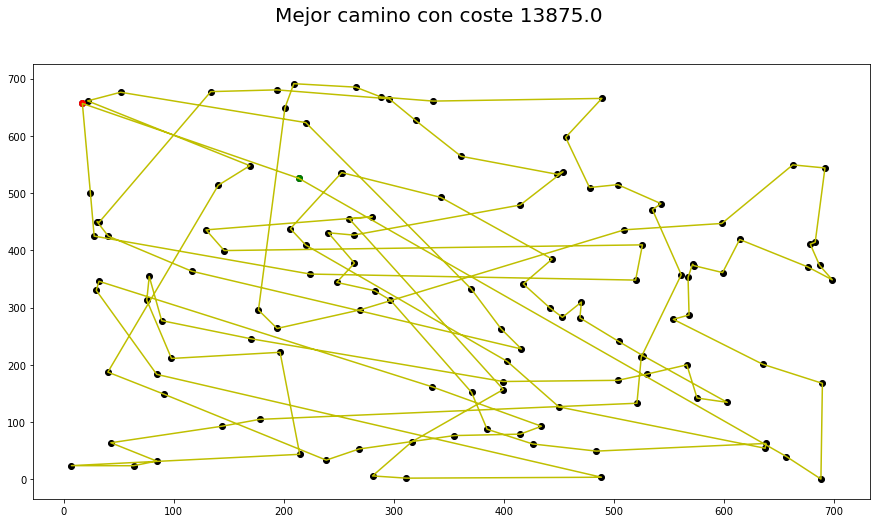

In [23]:
# Busqueda Local El Primero Mejor
busquedaLocalElPrimerMejor(x, y)

## Busqueda Local El Mejor Aleatorizado

In [24]:
# Devuelve el mejor vecino Aleatorizado
def mejorVecinoAleatorizado(w, numVecinos, sumador, maximo):
    mejor = w;
    mejorCoste = calculaCoste(w)
    costeSolAntigua = mejorCoste
    for i in range(0, numVecinos):
        w2 = w.copy();
        rnd1 = random.randint(0,len(w) - 1)
        rnd2 = random.randint(0,len(w) - 1)
        w2[rnd1], w2[rnd2] = w2[rnd2], w2[rnd1]       
        coste = calculaCosteVecino(costeSolAntigua, w, w2, rnd1, rnd2)
        if coste < mejorCoste :
            mejor = w2
            mejorCoste = coste 
        if sumador >= maximo:
            break
        else :
            sumador +=1
    return mejor, mejorCoste, sumador

In [25]:
# Algoritmo Busqueda Local El Mejor Aleatorizado
def busquedaLocalElMejorAleatorizado(x,y,numVecinosLim, k):
    analisisResultado = []
    mejorCam = []
    costeFinal = float("inf")
    for z in range(0,10):
        resultadoIntermedio = []
        tic()
        w = solucionAleatoria(len(x),z)
        costeActual = calculaCoste(w)
        mejorV = []
        encontrado = False
        maximo = 1600 * len(x)
        i = 0
        encontrado = False
        while i < maximo and encontrado == False:
            iterador = 0
            fueraBucle = False
            while iterador < k and fueraBucle == False:
                iterador += 1
                mejorV, mejorCost, i = mejorVecinoAleatorizado(w, numVecinosLim, i, maximo)  
                if mejorCost < costeActual or iterador > k:
                    fueraBucle = True
            if mejorCost < costeActual:
                w = mejorV.copy()
                costeActual = mejorCost
            elif i > maximo or mejorCost >= costeActual:
                encontrado = True
                
        if costeActual < costeFinal:
            costeFinal = costeActual
            mejorCam = w.copy()
        
        t = toc()
        resultadoIntermedio.append(z)
        resultadoIntermedio.append(costeActual)
        resultadoIntermedio.append(i)
        resultadoIntermedio.append(t)
        analisisResultado.append(resultadoIntermedio)
        
    representaResultados(analisisResultado)
    pintaCamino(mejorCam,x,y, costeFinal)

,Semilla,Coste,Numero Evaluaciones,Tiempo
0,0.0,17350.0,10465.0,0.108761
1,1.0,13363.0,18135.0,0.174994
2,2.0,13358.0,15535.0,0.120815
3,3.0,14824.0,13325.0,0.110183
4,4.0,13759.0,14885.0,0.157581
5,5.0,14604.0,18330.0,0.216048
6,6.0,14349.0,15275.0,0.120677
7,7.0,12493.0,17680.0,0.154587
8,8.0,13312.0,15145.0,0.150597
9,9.0,14599.0,15145.0,0.181026


Media coste:  14201.1
Desviación típica coste:  1331.7861398220896
Media numero de evaluaciones:  15392.0
Desviación típica de evaluaciones:  2365.3014841899353
Media tiempo:  0.14952678680419923


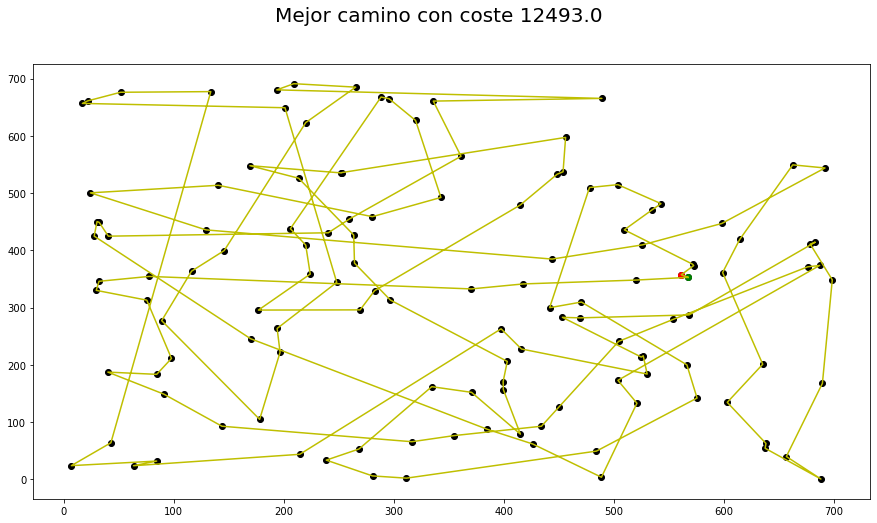

In [26]:
# Busqueda Local El Mejor Aleatorizado
numVecinosLim = round(len(x) / 2)
k = 5
busquedaLocalElMejorAleatorizado(x, y, numVecinosLim, k)

# Enfriamiento Simulado

In [27]:
# Selecciona candidatos
def seleccionaSolucion(sActual, coste):
    rnd1 = random.randint(0,len(sActual) - 1)
    rnd2 = random.randint(0,len(sActual) - 1)
    sCandidata = sActual.copy()
    sCandidata[rnd1], sCandidata[rnd2] = sCandidata[rnd2], sCandidata[rnd1]
    costeCandiata = calculaCosteVecino(coste, sActual, sCandidata, rnd1, rnd2)
    return sCandidata, costeCandiata

In [28]:
# Algoritmo de Enfriamiento Simulado
def enfriamientoSimuladoIteraciones(x, y, mu, phi, L):
    analisisResultado = []
    mejorCam = []
    costeFinal = float("inf")
    for z in range(0,10):
        resultadoIntermedio = []
        tic()
        sActual = solucionAleatoria(len(x),z)
        costeActual = calculaCoste(sActual)
        sBest = sActual.copy()
        costeBest = costeActual  
        numIteraciones = 80 * len(x)
        evaluaciones = 0
        resultado, km = greedy(x, y,"n")
        Tinicial = (mu /(- np.log(phi))) * km
        iterador = 0
        T = Tinicial
        while iterador < numIteraciones:
            for i in range(0,L):
                sCandidata, costeCandidata = seleccionaSolucion(sActual, costeActual)
                evaluaciones += 1
                delta = costeCandidata - costeActual
                exponente = (- delta) / T
                if (delta < 0) or (random.uniform(0, 1) < math.e**exponente):
                    sActual = sCandidata
                    costeActual = costeCandidata
                    if costeActual < costeBest:
                        sBest = sActual
                        costeBest = costeActual
            T = Tinicial / (1 + iterador)
            iterador += 1

        if costeBest < costeFinal:
            costeFinal = costeBest
            mejorCam = sBest.copy()
        
        t = toc()
        resultadoIntermedio.append(z)
        resultadoIntermedio.append(costeBest)
        resultadoIntermedio.append(evaluaciones)
        resultadoIntermedio.append(t)
        analisisResultado.append(resultadoIntermedio)
        
    representaResultados(analisisResultado)
    pintaCamino(mejorCam,x,y, costeFinal)

,Semilla,Coste,Numero Evaluaciones,Tiempo
0,0.0,10025.0,208000.0,2.091736
1,1.0,10858.0,208000.0,2.159450
2,2.0,9945.0,208000.0,2.101689
3,3.0,11370.0,208000.0,1.978402
4,4.0,11998.0,208000.0,2.096612
5,5.0,10413.0,208000.0,2.017388
6,6.0,11770.0,208000.0,1.825569
7,7.0,12260.0,208000.0,1.906492
8,8.0,9567.0,208000.0,1.765500
9,9.0,10619.0,208000.0,2.121610


Media coste:  10882.5
Desviación típica coste:  931.0910266993233
Media numero de evaluaciones:  208000.0
Desviación típica de evaluaciones:  0.0
Media tiempo:  2.0064446210861204


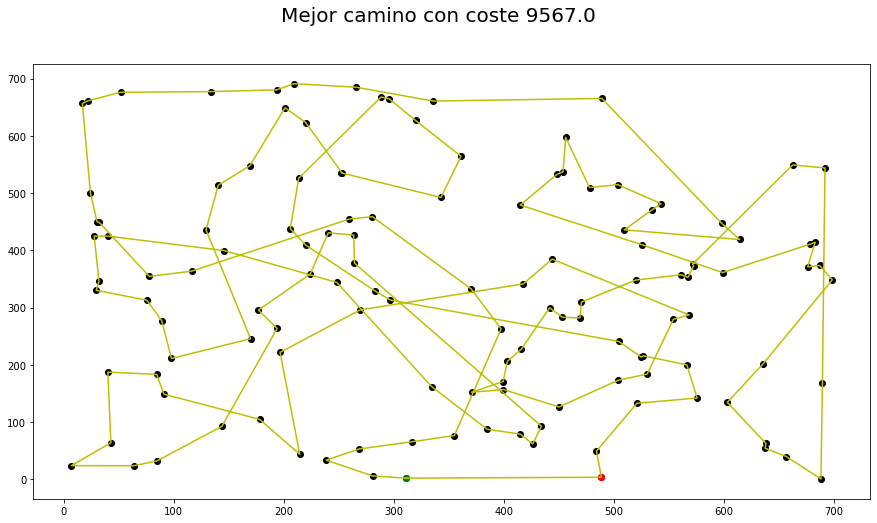

In [29]:
# Algoritmo de Enfriamiento Simulado
# Si el incremento el numero de vecinos (L) aumento la exploración y puedo conseguir llegar a un minimo
# Si el incremento es demasiado bajo, es un algoritmo muy parecido a la busqueda local del mejor aleatorizado
# Con alpha ( o metodo de enfriamiento) y L podemos variar la pendiente de la gráfica, es decir, explorar mas o menos
mu = 0.3
phi = 0.3
L = 20
enfriamientoSimuladoIteraciones(x, y, mu, phi, L)

,Semilla,Coste,Numero Evaluaciones,Tiempo
0,0.0,10235.0,208000.0,1.953749
1,1.0,9821.0,208000.0,2.045936
2,2.0,10049.0,208000.0,2.136201
3,3.0,10008.0,208000.0,2.124928
4,4.0,10626.0,208000.0,1.898846
5,5.0,9964.0,208000.0,2.087798
6,6.0,9204.0,208000.0,2.107085
7,7.0,10718.0,208000.0,2.042447
8,8.0,10259.0,208000.0,2.241260
9,9.0,10089.0,208000.0,1.966228


Media coste:  10097.3
Desviación típica coste:  423.26404944851566
Media numero de evaluaciones:  208000.0
Desviación típica de evaluaciones:  0.0
Media tiempo:  2.0604477405548094


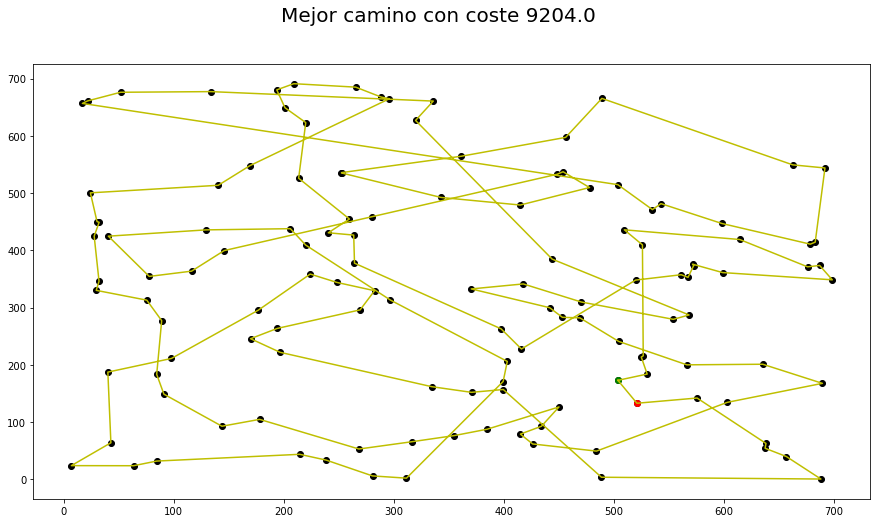

In [31]:
# Algoritmo de Enfriamiento Simulado
mu = 0.3
phi = 0.6
L = 20
enfriamientoSimuladoIteraciones(x, y, mu, phi, L)

,Semilla,Coste,Numero Evaluaciones,Tiempo
0,0.0,11005.0,208000.0,2.072809
1,1.0,10217.0,208000.0,2.053041
2,2.0,10411.0,208000.0,1.895174
3,3.0,10546.0,208000.0,2.005142
4,4.0,10284.0,208000.0,1.905098
5,5.0,9687.0,208000.0,2.093731
6,6.0,10115.0,208000.0,2.175344
7,7.0,11105.0,208000.0,1.985303
8,8.0,11801.0,208000.0,2.393071
9,9.0,10952.0,208000.0,2.012968


Media coste:  10612.3
Desviación típica coste:  608.989883148955
Media numero de evaluaciones:  208000.0
Desviación típica de evaluaciones:  0.0
Media tiempo:  2.0591679573059083


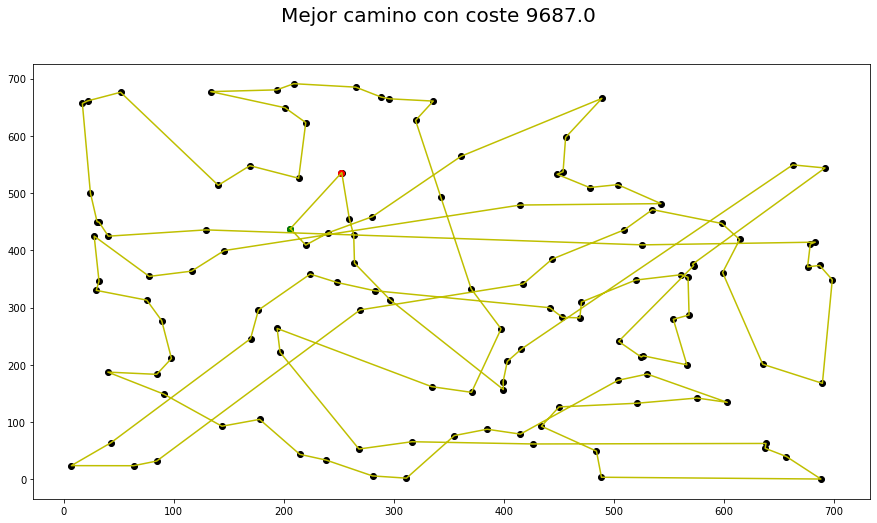

In [30]:
# Algoritmo de Enfriamiento Simulado
mu = 0.6
phi = 0.3
L = 20
enfriamientoSimuladoIteraciones(x, y, mu, phi, L)

,Semilla,Coste,Numero Evaluaciones,Tiempo
0,0.0,11167.0,208000.0,2.072433
1,1.0,10557.0,208000.0,2.104181
2,2.0,9840.0,208000.0,1.995019
3,3.0,9582.0,208000.0,2.069670
4,4.0,9780.0,208000.0,2.298748
5,5.0,9525.0,208000.0,2.186084
6,6.0,8896.0,208000.0,2.043528
7,7.0,9900.0,208000.0,2.287104
8,8.0,9828.0,208000.0,2.109993
9,9.0,10152.0,208000.0,2.038604


Media coste:  9922.7
Desviación típica coste:  611.7586760952213
Media numero de evaluaciones:  208000.0
Desviación típica de evaluaciones:  0.0
Media tiempo:  2.120536184310913


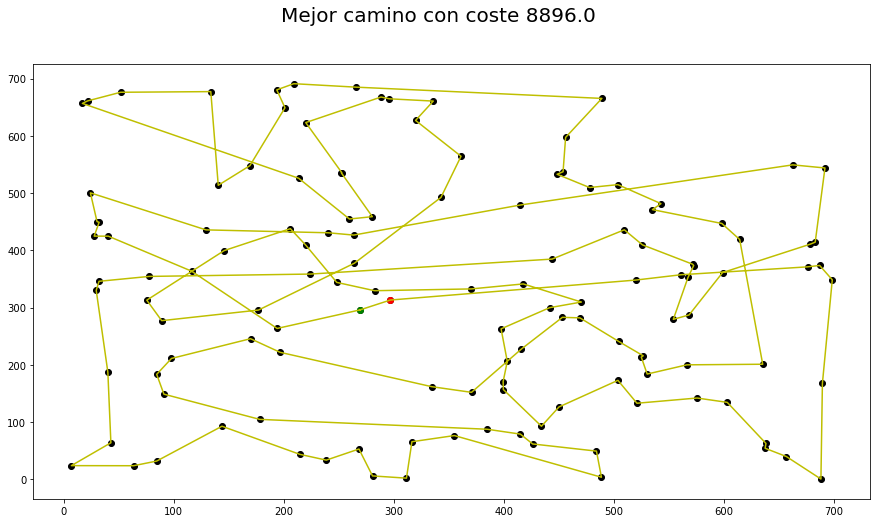

In [32]:
# Algoritmo de Enfriamiento Simulado
mu = 0.6
phi = 0.6
L = 20
enfriamientoSimuladoIteraciones(x, y, mu, phi, L)

,Semilla,Coste,Numero Evaluaciones,Tiempo
0,0.0,9419.0,520000.0,5.131290
1,1.0,9322.0,520000.0,5.332595
2,2.0,9194.0,520000.0,5.394823
3,3.0,10211.0,520000.0,5.234080
4,4.0,9668.0,520000.0,6.472796
5,5.0,9566.0,520000.0,7.298212
6,6.0,9296.0,520000.0,4.806507
7,7.0,9312.0,520000.0,5.635259
8,8.0,9499.0,520000.0,5.099253
9,9.0,9441.0,520000.0,4.952392


Media coste:  9492.8
Desviación típica coste:  288.6569667346424
Media numero de evaluaciones:  520000.0
Desviación típica de evaluaciones:  0.0
Media tiempo:  5.535720729827881


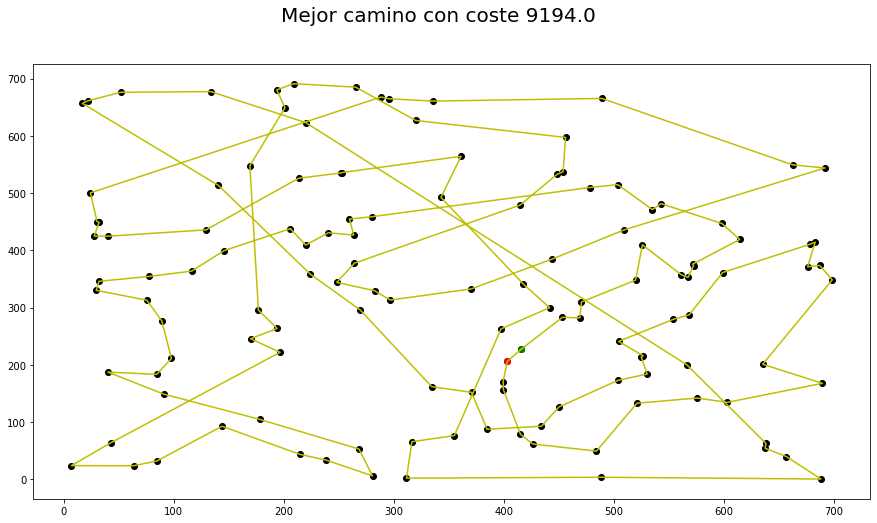

In [33]:
# Algoritmo de Enfriamiento Simulado
mu = 0.6
phi = 0.6
L = 50
enfriamientoSimuladoIteraciones(x, y, mu, phi, L)

# Búsqueda Tabú


In [34]:
# Greedy de la memoria de frecuencia eligiendo el menor
def greedyMenor(memoriaFrecuencias, n):
    memoriaTemporal = memoriaFrecuencias.copy()
    elegidos = []
    for i in range(0,n):
        provisional = np.where(memoriaTemporal[:][i] == np.amin(memoriaTemporal[:][i]))[0][0]
        elegidos.append(provisional)
        memoriaTemporal[: , provisional] = float('inf')
    
    return elegidos

In [35]:
# Algoritmo de búsqueda Tabú
def busquedaTabu(x, y, numVecinos, numIter, numReinici):
    analisisResultado = []
    mejorCam = []
    costeFinal = float("inf")
    for z in range(0,10):
        resultadoIntermedio = []
        tic()
        n = len(x)
        tenenciaTabu = round(n / 2)
        listaTabu = deque(maxlen=tenenciaTabu)
        sActual = solucionAleatoria(len(x),z)
        costeActual = calculaCoste(sActual)
        sBest = sActual.copy()
        costeBest = costeActual
        # Inicializo memoria de frecuencias
        memoriaFrecuencias = np.zeros((len(x),len(y)))
        for i in range(0,n):
            memoriaFrecuencias[i, sActual[i]] += 1
        
        iteraciones = numIter * n
        reinicializacion = round(iteraciones / (numReinici + 1))
        iterador = 0
        for i in range(0,iteraciones):
            # Genero/Analizo Vecinos
            mejorVecino = []
            costeMejor = float("inf")
            for k in range(0,numVecinos):
                piv1 = random.randint(0,len(x) - 1)
                piv2 = random.randint(0,len(x) - 1)
                sCandidata = sActual.copy()
                sCandidata[piv1], sCandidata[piv2] = sCandidata[piv2], sCandidata[piv1]
                costeCandidata = calculaCosteVecino(costeActual, sActual, sCandidata, piv1, piv2)
                iterador += 1
                
                seEvalua = False
                if((piv1,piv2) in listaTabu) or ((piv2,piv1) in listaTabu):
                    #Prueba de aspiración
                    if(costeCandidata < costeBest):
                        seEvalua = True
                else:
                    seEvalua = True
                    
                if (seEvalua and costeCandidata < costeMejor):  
                    mejorVecino = sCandidata.copy()
                    costeMejor = costeCandidata
                    mejorPiv1 = piv1
                    mejorPiv2 = piv2

            # Actualización de variables
            sActual = mejorVecino.copy()
            costeActual = costeMejor
            if costeMejor < costeBest:
                sBest = mejorVecino.copy()
                costeBest = costeMejor        

            # Actualizo Memoria de Frecuencias
            for p in range(0,n):
                memoriaFrecuencias[p, sActual[p]] += 1

            # Actualizo lista tabú
            listaTabu.append((mejorPiv1, mejorPiv2))
            
            # Reinicializaciones
            if ((i + 1) % reinicializacion) == 0:
                rnd = random.random()
                if rnd < 0.25:
                    # Solucion Inicial Aleatoria
                    sActual = random.sample(range(n),n)
                    costeActual = calculaCoste(sActual)
                elif rnd < 0.75:
                    # Solucion Greedy
                    sActual = greedyMenor(memoriaFrecuencias,n)
                    costeActual = calculaCoste(sActual) 
                else:
                    # Solucion es la mejor hasta el momento
                    sActual = sBest.copy()
                    costeActual = costeBest

                # Nueva Tenencia Tabú
                rnd2 = random.uniform(0,1)
                if rnd2 < 0.5:
                    tenenciaTabu = round(tenenciaTabu / 2)
                else:
                    tenenciaTabu = tenenciaTabu + round(tenenciaTabu / 2) 

                listaTabu = deque([],maxlen=tenenciaTabu)
        
        if costeBest < costeFinal:
            costeFinal = costeBest
            mejorCam = sBest.copy()
        
        t = toc()
        resultadoIntermedio.append(z)
        resultadoIntermedio.append(costeBest)
        resultadoIntermedio.append(iterador)
        resultadoIntermedio.append(t)
        analisisResultado.append(resultadoIntermedio)
        
    representaResultados(analisisResultado)
    pintaCamino(mejorCam,x,y, costeFinal)

,Semilla,Coste,Numero Evaluaciones,Tiempo
0,0.0,12432.0,208000.0,2.983811
1,1.0,12368.0,208000.0,2.748473
2,2.0,12475.0,208000.0,3.103222
3,3.0,12258.0,208000.0,2.861929
4,4.0,11951.0,208000.0,3.454406
5,5.0,11610.0,208000.0,3.116719
6,6.0,11925.0,208000.0,2.882677
7,7.0,12158.0,208000.0,2.518473
8,8.0,12328.0,208000.0,2.341043
9,9.0,12126.0,208000.0,3.208239


Media coste:  12163.1
Desviación típica coste:  270.13800999571396
Media numero de evaluaciones:  208000.0
Desviación típica de evaluaciones:  0.0
Media tiempo:  2.9218994617462157


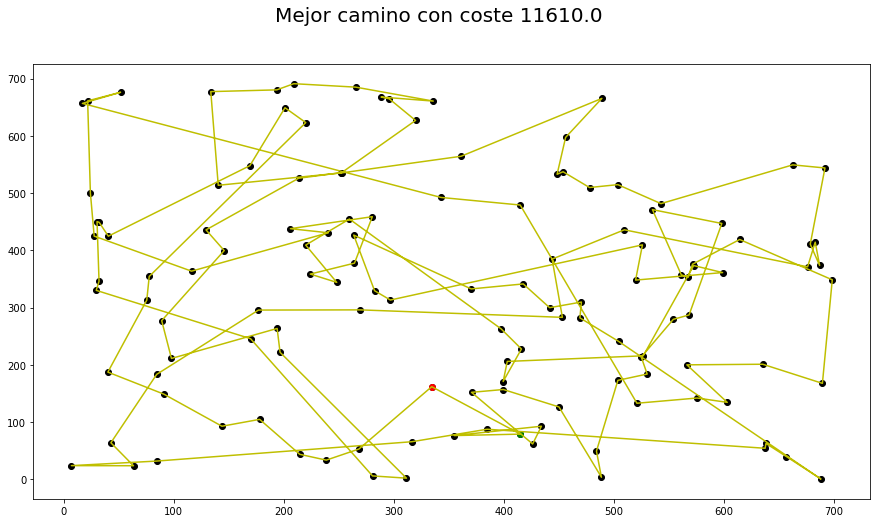

In [18]:
# Ejecución del algoritmo de Búsqueda Tabú
numIter = 40
numReinici = 4
numVecinos = 40
busquedaTabu(x, y, numVecinos, numIter, numReinici)

,Semilla,Coste,Numero Evaluaciones,Tiempo
0,0.0,10814.0,312000.0,3.466768
1,1.0,11398.0,312000.0,4.183962
2,2.0,11124.0,312000.0,3.934746
3,3.0,11104.0,312000.0,3.280408
4,4.0,11806.0,312000.0,4.245003
5,5.0,11383.0,312000.0,3.428852
6,6.0,11227.0,312000.0,3.602970
7,7.0,11535.0,312000.0,4.847811
8,8.0,11831.0,312000.0,4.041283
9,9.0,11813.0,312000.0,3.791881


Media coste:  11403.5
Desviación típica coste:  345.8770655080276
Media numero de evaluaciones:  312000.0
Desviación típica de evaluaciones:  0.0
Media tiempo:  3.8823685169219972


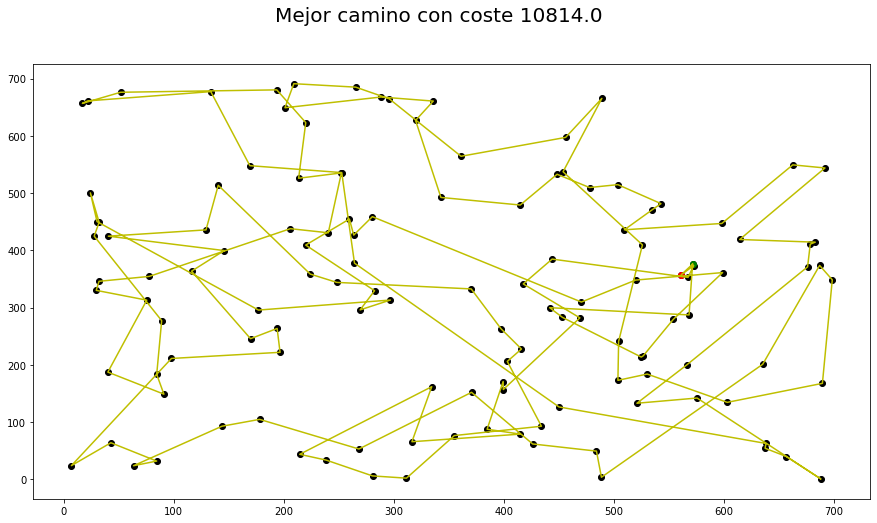

In [36]:
# Ejecución del algoritmo de Búsqueda Tabú
numIter = 60
numReinici = 4
numVecinos = 40
busquedaTabu(x, y, numVecinos, numIter, numReinici)

,Semilla,Coste,Numero Evaluaciones,Tiempo
0,0.0,12972.0,208000.0,2.346028
1,1.0,13067.0,208000.0,2.526142
2,2.0,12232.0,208000.0,2.281977
3,3.0,12837.0,208000.0,2.112880
4,4.0,12777.0,208000.0,2.282911
5,5.0,12728.0,208000.0,2.573200
6,6.0,12622.0,208000.0,2.507892
7,7.0,12486.0,208000.0,2.095322
8,8.0,12616.0,208000.0,2.392194
9,9.0,12927.0,208000.0,2.117260


Media coste:  12726.4
Desviación típica coste:  248.70205288881536
Media numero de evaluaciones:  208000.0
Desviación típica de evaluaciones:  0.0
Media tiempo:  2.3235806226730347


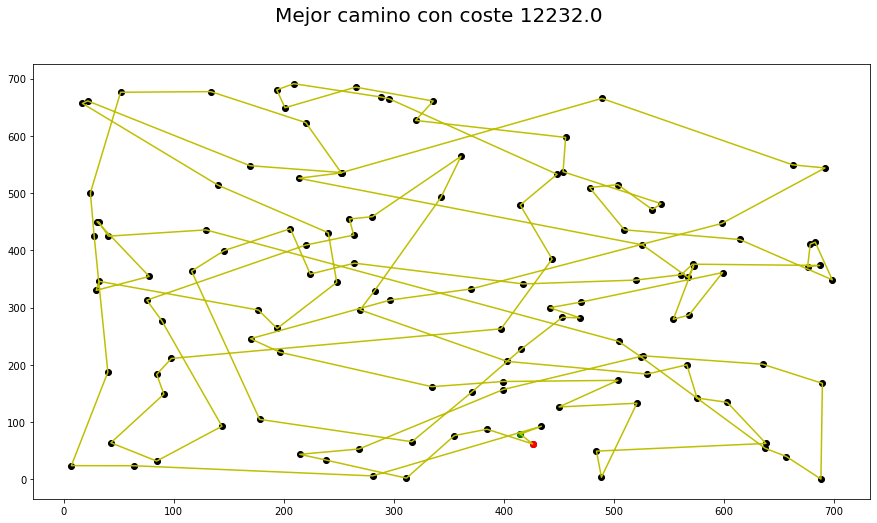

In [37]:
# Ejecución del algoritmo de Búsqueda Tabú
numIter = 40
numReinici = 150
numVecinos = 40
busquedaTabu(x, y, numVecinos, numIter, numReinici)

,Semilla,Coste,Numero Evaluaciones,Tiempo
0,0.0,9456.0,364000.0,3.544345
1,1.0,10030.0,364000.0,4.238985
2,2.0,11405.0,364000.0,4.424628
3,3.0,10739.0,364000.0,4.345467
4,4.0,9626.0,364000.0,4.334188
5,5.0,9417.0,364000.0,3.700514
6,6.0,10683.0,364000.0,4.599446
7,7.0,10152.0,364000.0,4.776608
8,8.0,9955.0,364000.0,3.931058
9,9.0,10096.0,364000.0,4.083038


Media coste:  10155.9
Desviación típica coste:  628.4489637194098
Media numero de evaluaciones:  364000.0
Desviación típica de evaluaciones:  0.0
Media tiempo:  4.197827649116516


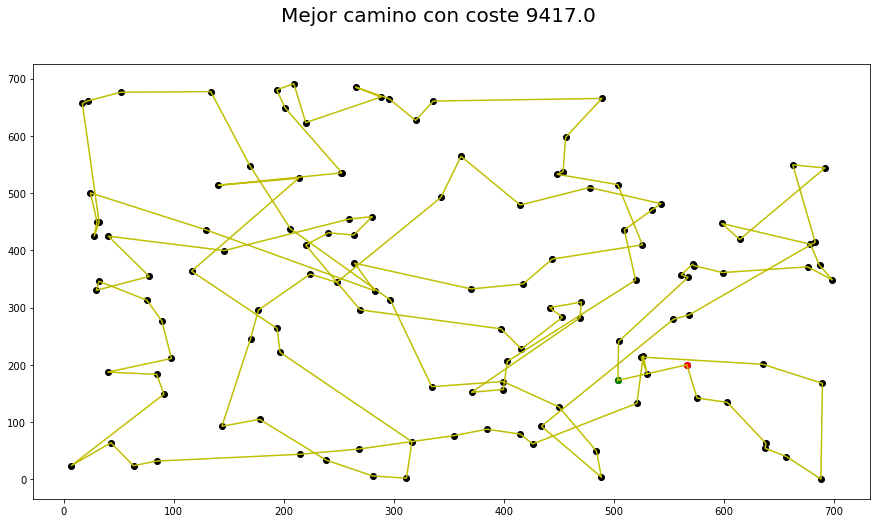

In [38]:
# Ejecución del algoritmo de Búsqueda Tabú
numIter = 40
numReinici = 4
numVecinos = 70
busquedaTabu(x, y, numVecinos, numIter, numReinici)

,Semilla,Coste,Numero Evaluaciones,Tiempo
0,0.0,9259.0,546000.0,4.971312
1,1.0,10316.0,546000.0,6.136664
2,2.0,10511.0,546000.0,5.774971
3,3.0,10399.0,546000.0,6.732756
4,4.0,10743.0,546000.0,5.414628
5,5.0,10502.0,546000.0,8.172070
6,6.0,9517.0,546000.0,5.577754
7,7.0,10519.0,546000.0,6.335914
8,8.0,10006.0,546000.0,5.910733
9,9.0,10908.0,546000.0,5.937285


Media coste:  10268.0
Desviación típica coste:  525.1689675184973
Media numero de evaluaciones:  546000.0
Desviación típica de evaluaciones:  0.0
Media tiempo:  6.096408843994141


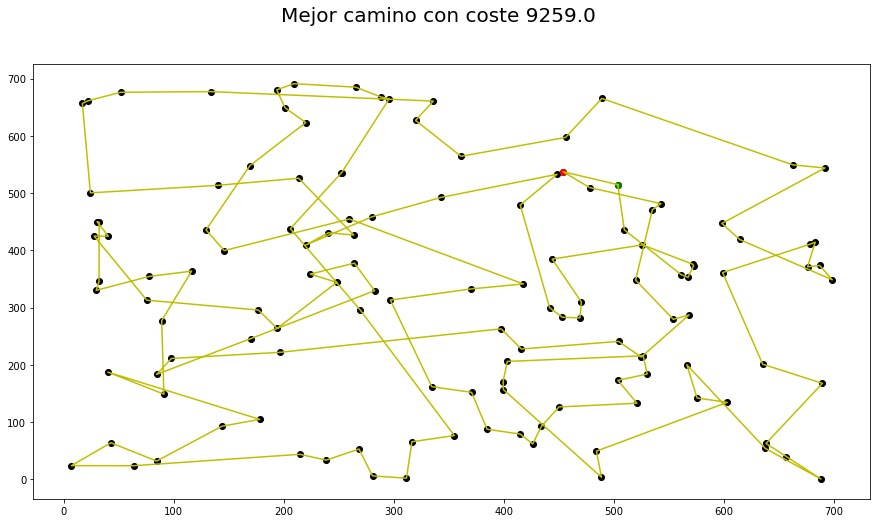

In [39]:
# Ejecución del algoritmo de Búsqueda Tabú
numIter = 60
numReinici = 10
numVecinos = 70
busquedaTabu(x, y, numVecinos, numIter, numReinici)